In [24]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import numpy as np
import matplotlib.pyplot as plt
from core.monte_carlo_exotic import (
    monte_carlo_asian_geometric,
    asian_geometric_call_analytic
)
np.random.seed(42)

In [25]:
S0, K, T, r, sigma = 100, 100, 1, 0.05, 0.2
num_steps = 100
analytic = asian_geometric_call_analytic(S0, K, T, r, sigma)

sim_counts = np.logspace(2, 6, 8, dtype=int)
errors = []
prices = []

for N in sim_counts:
    price = monte_carlo_asian_geometric(
        S0=100,
        K=100,
        T=1,
        r=0.05,
        sigma=0.2,
        num_simulations=N,
        num_steps=200  # daha stabil sonuçlar
    )
    prices.append(price)
    errors.append(abs(price - analytic))



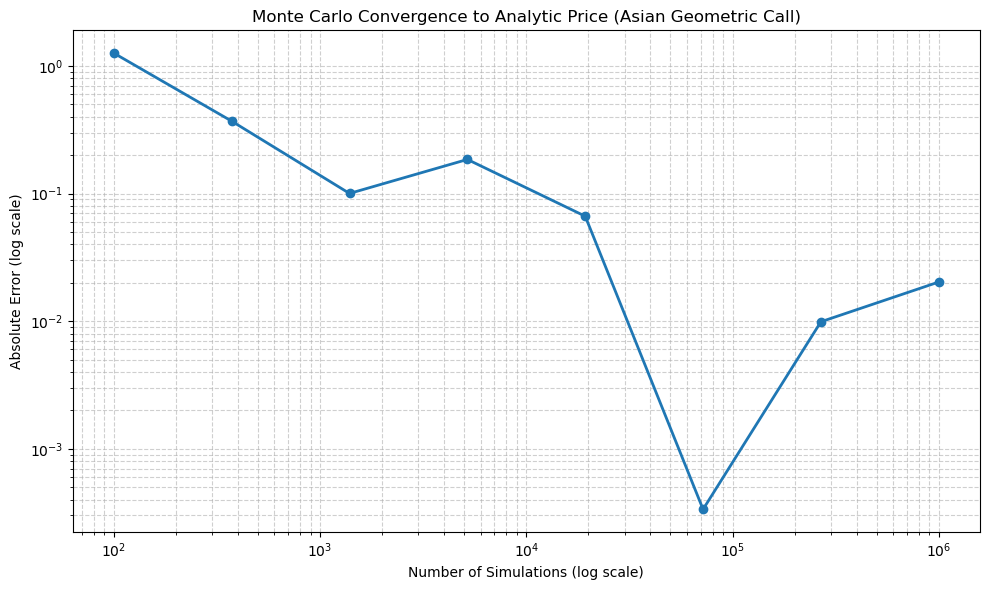

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(sim_counts, errors, marker='o', linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of Simulations (log scale)")
plt.ylabel("Absolute Error (log scale)")
plt.title("Monte Carlo Convergence to Analytic Price (Asian Geometric Call)")
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [27]:
print(f"Analytic Price: {analytic:.4f}")
print("-" * 50)
print(f"{'N':<10} {'MC Price':<12} {'Error':<10}")
print("-" * 50)
for n, p, e in zip(sim_counts, prices, errors):
    print(f"{n:<10d} {p:<12.4f} {e:<10.4f}")


Analytic Price: 5.5468
--------------------------------------------------
N          MC Price     Error     
--------------------------------------------------
100        6.8099       1.2631    
372        5.9176       0.3708    
1389       5.4465       0.1004    
5179       5.3614       0.1854    
19306      5.6133       0.0665    
71968      5.5472       0.0003    
268269     5.5369       0.0099    
1000000    5.5671       0.0203    


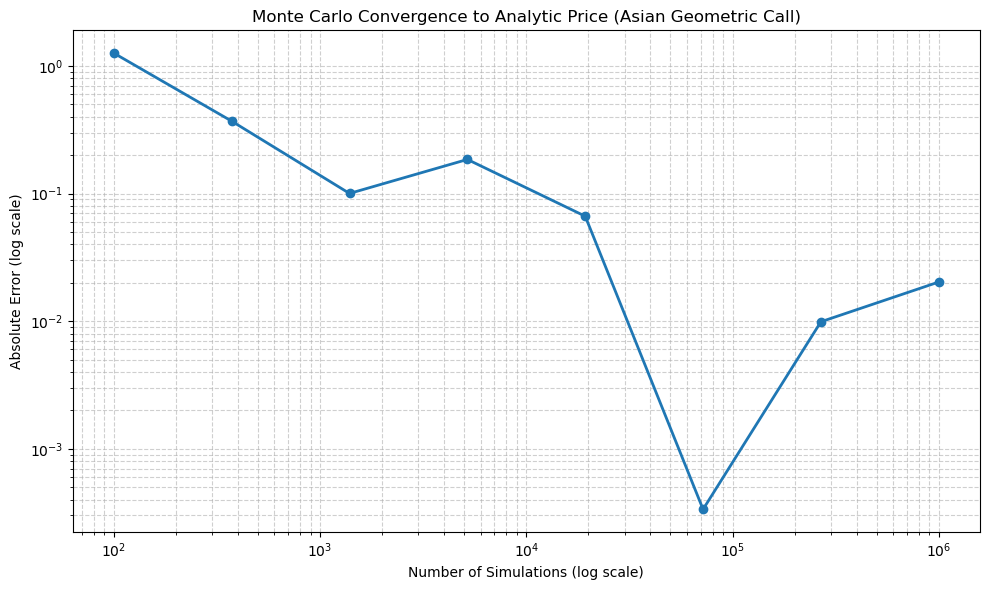

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(sim_counts, errors, marker='o', linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of Simulations (log scale)")
plt.ylabel("Absolute Error (log scale)")
plt.title("Monte Carlo Convergence to Analytic Price (Asian Geometric Call)")
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("../assets/convergence_plot.png")  # assets klasörüne kaydet
plt.show()
